In [2]:
#kütüphane ekleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
#veri yükleme
data=pd.read_csv("C:/Users/bedir/Downloads/maaslar_yeni.csv")
data

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


# MLR

In [4]:
x = data.iloc[:,2:5]
y = data.iloc[:,5:]
X = x.values
Y = y.values



In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())
print("MLR R2 degeri:")
print(r2_score(Y,lin_reg.predict(X)))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                    8.38e-14
Time:                        15:20:00   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# PR

In [6]:
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(X)
x_poly


array([[1.0000000e+00, 1.0000000e+00, 5.0000000e+00, ..., 1.2250000e+05,
        1.7150000e+06, 2.4010000e+07],
       [1.0000000e+00, 2.0000000e+00, 5.0000000e+00, ..., 1.2250000e+05,
        1.7150000e+06, 2.4010000e+07],
       [1.0000000e+00, 3.0000000e+00, 5.0000000e+00, ..., 1.2250000e+05,
        1.7150000e+06, 2.4010000e+07],
       ...,
       [1.0000000e+00, 8.0000000e+00, 1.0000000e+01, ..., 1.4440000e+05,
        5.4872000e+05, 2.0851360e+06],
       [1.0000000e+00, 9.0000000e+00, 1.0000000e+00, ..., 2.5000000e+03,
        1.2500000e+05, 6.2500000e+06],
       [1.0000000e+00, 1.0000000e+01, 9.0000000e+00, ..., 5.5800900e+05,
        5.1460830e+06, 4.7458321e+07]])

In [7]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)
model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
print(model2.fit().summary())
print("PR R2 degeri:")
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.11
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                    7.49e-07
Time:                        14:51:30   Log-Likelihood:                         -317.93
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# SVR

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X) 
X_test = sc.fit_transform(Y)

In [9]:
scl = StandardScaler()
x_olcekli = scl.fit_transform(X)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(Y)

In [10]:
svr_reg = SVR(kernel = "rbf")
svr_reg.fit(x_olcekli,y_olcekli)
print("SVR R2 degeri:")
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)) )

SVR R2 degeri:
0.6287203839391851


C:\Users\bedir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# DT

In [11]:
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)
print("DT R2 degeri:")
print(r2_score(Y, r_dt.predict(X)) )

DT R2 degeri:
1.0


In [12]:
print('dt ols') 
model3 = sm.OLS(r_dt.predict(X),x_olcekli)
print(model3. fit().summary())

dt ols
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.350
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              4.849
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                     0.00795
Time:                        14:51:30   Log-Likelihood:                         -328.55
No. Observations:                  30   AIC:                                      663.1
Df Residuals:                      27   BIC:                                      667.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# RF

In [13]:
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())
print("RF R2 degeri")
print(r2_score(Y, rf_reg.predict(X)))

RF R2 degeri
0.9475498704400864


# KARŞILAŞTIRMA

In [14]:
print("MLR R2 degeri:")
print(r2_score(Y,lin_reg.predict(X)))
print("PR R2 degeri:")
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))
print("SVR R2 degeri:")
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))
print("DT R2 degeri:")
print(r2_score(Y, r_dt.predict(X)) )
print("RF R2 degeri")
print(r2_score(Y, rf_reg.predict(X)))

MLR R2 degeri:
0.585720705085402
PR R2 degeri:
0.999000356022587
SVR R2 degeri:
0.6287203839391851
DT R2 degeri:
1.0
RF R2 degeri
0.9475498704400864


# KARŞILAŞTIRMANIN GÖRSELLEŞTİRİLMESİ

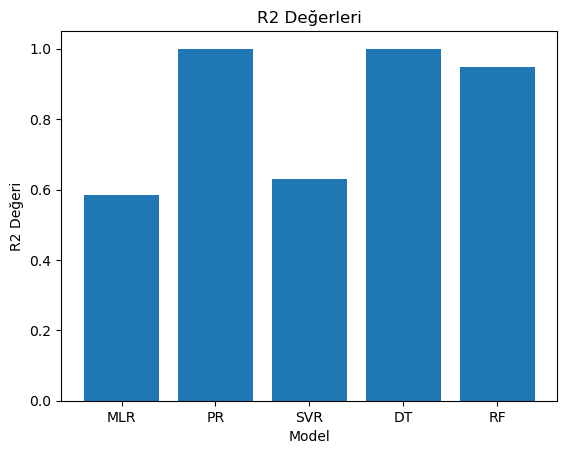

In [18]:
# R2 değerleri
r2_values = [r2_score(Y, lin_reg.predict(X)),
             r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))),
             r2_score(y_olcekli, svr_reg.predict(x_olcekli)),
             r2_score(Y, r_dt.predict(X)),
             r2_score(Y, rf_reg.predict(X))]

# Modellerin isimleri
model_names = ['MLR', 'PR', 'SVR', 'DT', 'RF']

# Grafiği çizme
plt.bar(model_names, r2_values)
plt.title('R2 Değerleri')
plt.xlabel('Model')
plt.ylabel('R2 Değeri')
plt.show()

In [19]:
data.corr()

C:\Users\bedir\AppData\Local\Temp\ipykernel_1928\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
Calisan ID,1.000000,0.331847,0.206278,-0.251278,0.226287
UnvanSeviyesi,0.331847,1.000000,-0.125200,0.034948,0.727036
Kidem,0.206278,-0.125200,1.000000,0.322796,0.117964
Puan,-0.251278,0.034948,0.322796,1.000000,0.201474
maas,0.226287,0.727036,0.117964,0.201474,1.000000
